## Installation

Installing Bio, transformers, genomic-benchmarks, and datasets packages.  The Bio package is from Biopython; transformers package for machine learning (pytorch, tensorflow); genomic-benchmarks and datasets from ML-Bioinfo-CEITEC.


In [ ]:
# already set up on Expanse; toggle for colab

# pip install -qq Bio transformers genomic-benchmarks datasets transformers[torch] pyfaidx

Set path prefix for Expanse

In [1]:
path_prefix = "/expanse/lustre/projects/nji102/sgriesmer/"

Import SNP datasets

In [2]:
import pandas as pd

#abs_diff_plus_log_odds_scores_norm = pd.read_csv(path_prefix + "DNABERT_2/output/SNP_PRVCS_0_10492-abs_diff_plus_log_odds_scores_norm_results_by_variant.csv", sep=',')
abs_diff_plus_log_odds_scores_norm = pd.read_csv(path_prefix + "DNABERT_2/output/SNP_PRVCS_REG_test_all-abs_diff_plus_log_odds_scores_norm_results_by_variant.csv", sep=',')
abs_diff_plus_log_odds_scores_norm.head(), abs_diff_plus_log_odds_scores_norm.shape


(   BroadDnd41CtcfUniPk151-ran  BroadDnd41Ezh239875UniPk151-ran  \
 0                   -0.154390                        -0.517654   
 1                   -0.154486                        -0.526337   
 2                   -0.154486                        -0.528125   
 3                   -0.153836                        -0.513125   
 4                   -0.154373                        -0.490701   
 
    BroadGm12878CtcfUniPk151-ran  BroadGm12878Ezh239875UniPk151-ran  \
 0                     -0.198518                           1.045550   
 1                     -0.198527                           1.097025   
 2                     -0.198532                          -0.595088   
 3                     -0.157125                           0.776755   
 4                     -0.197923                          -0.629536   
 
    BroadH1hescChd1a301218aUniPk151-ran  BroadH1hescCtcfUniPk151-ran  \
 0                            -0.360801                    -0.179535   
 1                      

Choose test set for run

In [3]:
import xgboost

/cm/shared/apps/spack/0.17.3/cpu/b/opt/spack/linux-rocky8-zen/gcc-8.5.0/anaconda3-2021.05-q4munrgvh7qp4o7r3nzcdkbuph4z7375/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [5]:
X=abs_diff_plus_log_odds_scores_norm[0:61170]

In [6]:
X

,BroadDnd41CtcfUniPk151-ran,BroadDnd41Ezh239875UniPk151-ran,BroadGm12878CtcfUniPk151-ran,BroadGm12878Ezh239875UniPk151-ran,BroadH1hescChd1a301218aUniPk151-ran,BroadH1hescCtcfUniPk151-ran,BroadH1hescEzh239875UniPk151-ran,BroadH1hescJarid1aab26049UniPk151-ran,BroadH1hescRbbp5a300109aUniPk151-ran,BroadHelas3CtcfUniPk151-ran,...,UwMcf7CtcfUniPk151-ran.1,UwNb4CtcfUniPk151-ran.1,UwNhdfneoCtcfUniPk151-ran.1,UwNhekCtcfUniPk151-ran.1,UwNhlfCtcfUniPk151-ran.1,UwRptecCtcfUniPk151-ran.1,UwSaecCtcfUniPk151-ran.1,UwSknshraCtcfUniPk151-ran.1,UwWerirb1CtcfUniPk151-ran.1,UwWi38CtcfUniPk151-ran.1
0,-0.154390,-0.517654,-0.198518,1.045550,-0.360801,-0.179535,-0.217770,-0.459057,-0.324826,-0.175673,...,-0.343486,-0.223921,-0.331870,-0.277389,-0.254582,-0.130768,-0.452403,-0.261299,-0.212030,-0.328566
1,-0.154486,-0.526337,-0.198527,1.097025,-0.372392,-0.179535,-0.219437,-0.458986,-0.324962,-0.175673,...,-0.338357,-0.215674,-0.373075,-0.241736,-0.256540,-0.332558,-0.488405,-0.259493,-0.215981,-0.319342
2,-0.154486,-0.528125,-0.198532,-0.595088,-0.373646,-0.179535,-0.220829,-0.459128,-0.324945,-0.175666,...,-0.335260,-0.212019,-0.208013,-0.215740,-0.274748,-0.299737,-0.102483,-0.259153,-0.211673,-0.297017
3,-0.153836,-0.513125,-0.157125,0.776755,-0.373142,-0.178239,-0.220690,-0.450845,-0.304771,-0.175553,...,-0.193427,-0.198190,-0.265678,-0.257696,-0.214739,2.196165,-0.361218,-0.226442,1.717090,-0.153760
4,-0.154373,-0.490701,-0.197923,-0.629536,-0.373864,-0.179529,-0.220554,-0.459159,-0.324434,-0.175160,...,-0.230177,-0.158104,-0.394389,-0.320062,-0.028447,-0.222698,-0.152905,-0.251612,-0.201743,-0.245226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61165,-0.136322,-0.522225,-0.169776,-0.661247,-0.359026,-0.152563,-0.191376,-0.457834,-0.282376,-0.147173,...,-0.292017,-0.190517,-0.381051,-0.211006,-0.245971,-0.323873,-0.415494,-0.207852,-0.173248,-0.288908
61166,-0.136286,-0.522024,-0.169777,-0.668193,-0.334889,-0.152524,-0.191320,-0.457706,-0.282315,-0.147162,...,-0.126047,-0.188932,-0.170777,-0.182490,-0.245290,-0.191485,-0.198568,-0.182700,-0.177811,-0.235758
61167,-0.136322,-0.520121,-0.169780,-0.664945,-0.356867,-0.152564,-0.191359,-0.457910,-0.282280,-0.147173,...,-0.292230,-0.192022,-0.353683,-0.243476,-0.245743,-0.315652,-0.448360,-0.208909,-0.177915,-0.269982
61168,-0.136258,1.356259,-0.169359,2.570300,-0.100510,-0.152563,-0.178538,2.360620,-0.154137,-0.147163,...,-0.297182,-0.188820,-0.111741,-0.233245,-0.243760,-0.263651,-0.435328,-0.207928,-0.169643,-0.263580


In [7]:
col_lab = list(range(0,1380))
X = X.set_axis(col_lab, axis="columns")

In [8]:
X

,0,1,2,3,4,5,6,7,8,9,...,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379
0,-0.154390,-0.517654,-0.198518,1.045550,-0.360801,-0.179535,-0.217770,-0.459057,-0.324826,-0.175673,...,-0.343486,-0.223921,-0.331870,-0.277389,-0.254582,-0.130768,-0.452403,-0.261299,-0.212030,-0.328566
1,-0.154486,-0.526337,-0.198527,1.097025,-0.372392,-0.179535,-0.219437,-0.458986,-0.324962,-0.175673,...,-0.338357,-0.215674,-0.373075,-0.241736,-0.256540,-0.332558,-0.488405,-0.259493,-0.215981,-0.319342
2,-0.154486,-0.528125,-0.198532,-0.595088,-0.373646,-0.179535,-0.220829,-0.459128,-0.324945,-0.175666,...,-0.335260,-0.212019,-0.208013,-0.215740,-0.274748,-0.299737,-0.102483,-0.259153,-0.211673,-0.297017
3,-0.153836,-0.513125,-0.157125,0.776755,-0.373142,-0.178239,-0.220690,-0.450845,-0.304771,-0.175553,...,-0.193427,-0.198190,-0.265678,-0.257696,-0.214739,2.196165,-0.361218,-0.226442,1.717090,-0.153760
4,-0.154373,-0.490701,-0.197923,-0.629536,-0.373864,-0.179529,-0.220554,-0.459159,-0.324434,-0.175160,...,-0.230177,-0.158104,-0.394389,-0.320062,-0.028447,-0.222698,-0.152905,-0.251612,-0.201743,-0.245226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61165,-0.136322,-0.522225,-0.169776,-0.661247,-0.359026,-0.152563,-0.191376,-0.457834,-0.282376,-0.147173,...,-0.292017,-0.190517,-0.381051,-0.211006,-0.245971,-0.323873,-0.415494,-0.207852,-0.173248,-0.288908
61166,-0.136286,-0.522024,-0.169777,-0.668193,-0.334889,-0.152524,-0.191320,-0.457706,-0.282315,-0.147162,...,-0.126047,-0.188932,-0.170777,-0.182490,-0.245290,-0.191485,-0.198568,-0.182700,-0.177811,-0.235758
61167,-0.136322,-0.520121,-0.169780,-0.664945,-0.356867,-0.152564,-0.191359,-0.457910,-0.282280,-0.147173,...,-0.292230,-0.192022,-0.353683,-0.243476,-0.245743,-0.315652,-0.448360,-0.208909,-0.177915,-0.269982
61168,-0.136258,1.356259,-0.169359,2.570300,-0.100510,-0.152563,-0.178538,2.360620,-0.154137,-0.147163,...,-0.297182,-0.188820,-0.111741,-0.233245,-0.243760,-0.263651,-0.435328,-0.207928,-0.169643,-0.263580


In [9]:
import pandas as pd

snp_prvcs = pd.read_csv(path_prefix + "DNABERT_2/Datasets/PRVCS/REG_dataset_XY-named.csv", sep=',')


In [10]:
# Using trucated model
#y = snp_prvcs['label'][0:10492]

y = snp_prvcs['label'][0:61170]

In [11]:
y

0        1
1        1
2        1
3        1
4        1
        ..
61165    0
61166    0
61167    0
61168    0
61169    0
Name: label, Length: 61170, dtype: int64

In [12]:
y[5240:5250]

5240    1
5241    1
5242    1
5243    1
5244    1
5245    1
5246    1
5247    0
5248    0
5249    0
Name: label, dtype: int64

In [13]:
snp_prvcs[5240:5250]

,Name,Chromosome,Position,Ref,Alt,label
5240,SNP05241,X,113818582,G,C,1
5241,SNP05242,X,115305126,A,C,1
5242,SNP05243,X,115590299,C,G,1
5243,SNP05244,X,128870791,C,A,1
5244,SNP05245,X,135726950,A,G,1
5245,SNP05246,X,138612197,T,C,1
5246,SNP05247,X,145078733,A,G,1
5247,SNP05248,1,5318950,A,T,0
5248,SNP05249,1,5320503,C,T,0
5249,SNP05250,1,5321508,G,C,0


In [14]:
from sklearn.model_selection import train_test_split
test_size = 0.3
train_percent = 0.70
#val_percent = 0.15
#test_percent = 0.15
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_percent, random_state=seed)

# Added validation dataset (commented out)

#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_percent/(test_percent+val_percent), random_state=seed)

Try logistic regression for classification

In [15]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_train_model = lr_model.fit(X_train,y_train)
pred_lr = lr_model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score

print("Accuracy_model_lr: %.4f" % (accuracy_score(y_test, pred_lr))) 
print("F1_model_lr: %.4f" % (f1_score(y_test, pred_lr)))
print("MCC_model_lr: %.4f" % (matthews_corrcoef(y_test, pred_lr)))
print("ROC_AUC_model_lr: %.4f" % (roc_auc_score(y_test, pred_lr))) # don't know about call: y_score vs. pred

Accuracy_model_lr: 0.9129
F1_model_lr: 0.0037
MCC_model_lr: -0.0041
ROC_AUC_model_lr: 0.4996


In [17]:
from sklearn.metrics import confusion_matrix

#confusion_matrix(y_val, pred1)
tn, fp, fn, tp = confusion_matrix(y_test, pred_lr).ravel()
print(tp, fp, fn, tn)

3 45 1554 16750


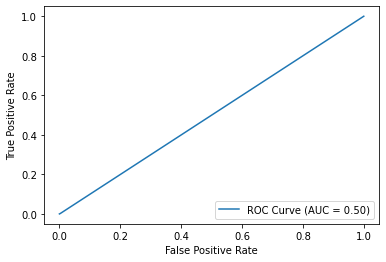

In [18]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred_lr)
roc_auc = roc_auc_score(y_test, pred_lr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [19]:
# Save logistic regression model

from joblib import dump, load

best_estimator = lr_train_model
dump(best_estimator, path_prefix + "DNABERT_2/Output_Models/" + "model_xpg_boost_PRVCS_REG_lr.joblib")

['/expanse/lustre/projects/nji102/sgriesmer/DNABERT_2/Output_Models/model_xpg_boost_PRVCS_REG_lr.joblib']

Try logistic regression with penalty

In [20]:
from sklearn.linear_model import LogisticRegression

lrpen_model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)
lrpen_train_model = lrpen_model.fit(X_train,y_train)
pred_lrpen = lrpen_model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score

print("Accuracy_model_lrpen: %.4f" % (accuracy_score(y_test, pred_lrpen))) 
print("F1_model_lrpen: %.4f" % (f1_score(y_test, pred_lrpen)))
print("MCC_model_lrpen: %.4f" % (matthews_corrcoef(y_test, pred_lrpen)))
print("ROC_AUC_model_lrpen: %.4f" % (roc_auc_score(y_test, pred_lrpen))) # don't know about call: y_score vs. pred

Accuracy_model_lrpen: 0.9132
F1_model_lrpen: 0.0025
MCC_model_lrpen: -0.0058
ROC_AUC_model_lrpen: 0.4995


In [22]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score

model1 = XGBClassifier() 
model2 = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5) 
train_model1 = model1.fit(X_train, y_train) 
train_model2 = model2.fit(X_train, y_train) 
#pred1 = train_model1.predict(X_val) 
#pred2 = train_model2.predict(X_val) 
pred1 = train_model1.predict(X_test) 
pred2 = train_model2.predict(X_test)
#print("Accuracy_model1: %.4f" % (accuracy_score(y_val, pred1))) 
#print("Accuracy_model2: %.4f" % (accuracy_score(y_val, pred2))) 
#print("F1_model1: %.4f" % (f1_score(y_val, pred1)))
#print("F1_model2: %.4f" % (f1_score(y_val, pred2)))
#print("MCC_model1: %.4f" % (matthews_corrcoef(y_val, pred1)))
#print("MCC_model2: %.4f" % (matthews_corrcoef(y_val, pred2)))
#print("ROC_AUC_model1: %.4f" % (roc_auc_score(y_val, pred1))) # don't know about call: y_score vs. pred
#print("ROC_AUC_model2: %.4f" % (roc_auc_score(y_val, pred2))) # don't know about call: y_score vs. pred
print("Accuracy_model1: %.4f" % (accuracy_score(y_test, pred1))) 
print("Accuracy_model2: %.4f" % (accuracy_score(y_test, pred2))) 
print("F1_model1: %.4f" % (f1_score(y_test, pred1)))
print("F1_model2: %.4f" % (f1_score(y_test, pred2)))
print("MCC_model1: %.4f" % (matthews_corrcoef(y_test, pred1)))
print("MCC_model2: %.4f" % (matthews_corrcoef(y_test, pred2)))
print("ROC_AUC_model1: %.4f" % (roc_auc_score(y_test, pred1))) # don't know about call: y_score vs. pred
print("ROC_AUC_model2: %.4f" % (roc_auc_score(y_test, pred2))) # don't know about call: y_score vs. pred



Accuracy_model1: 0.9389
Accuracy_model2: 0.9413
F1_model1: 0.6472
F1_model2: 0.6621
MCC_model1: 0.6139
MCC_model2: 0.6301
ROC_AUC_model1: 0.8125
ROC_AUC_model2: 0.8219


In [23]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, pred1).ravel()
print(tp, fp, fn, tn)

1028 592 529 16203


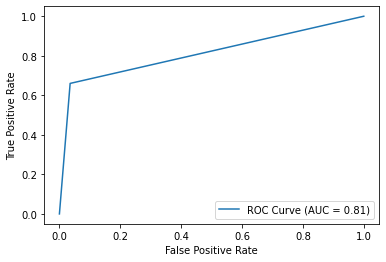

In [24]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred1)
roc_auc = roc_auc_score(y_test, pred1)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, pred2).ravel()
print(tp, fp, fn, tn)

1056 577 501 16218


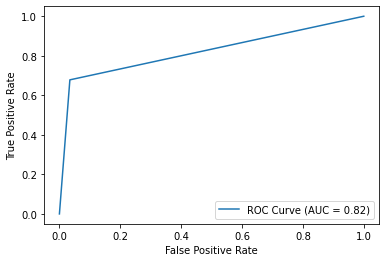

In [26]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred2)
roc_auc = roc_auc_score(y_test, pred2)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [29]:
model3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=7)

train_model3 = model3.fit(X_train, y_train)
#pred3 = train_model3.predict(X_val)
#print("Accuracy_model3: %.4f" % (accuracy_score(y_val, pred3)))
#print("F1_model3: %.4f" % (f1_score(y_val, pred3)))
#print("MCC_model3: %.4f" % (matthews_corrcoef(y_val, pred3)))
#print("ROC_AUC_model3: %.4f" % (roc_auc_score(y_val, pred3))) # don't know about call: y_score vs. pr
pred3 = train_model3.predict(X_test)
print("Accuracy_model3: %.4f" % (accuracy_score(y_test, pred3)))
print("F1_model3: %.4f" % (f1_score(y_test, pred3)))
print("MCC_model3: %.4f" % (matthews_corrcoef(y_test, pred3)))
print("ROC_AUC_model3: %.4f" % (roc_auc_score(y_test, pred3))) # don't know about call: y_score vs. pred

Accuracy_model3: 0.9425
F1_model3: 0.6694
MCC_model3: 0.6381
ROC_AUC_model3: 0.8261


In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, pred3).ravel()
print(tp, fp, fn, tn)

1068 566 489 16229


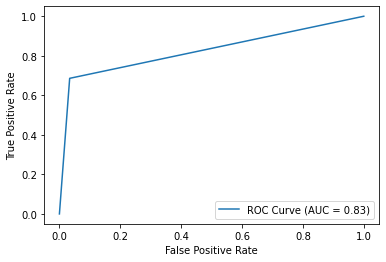

In [31]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred3)
roc_auc = roc_auc_score(y_test, pred3)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [32]:
from sklearn.model_selection import GridSearchCV

param_test = {
 'max_depth':[4],
 'min_child_weight':[2],
 'learning_rate':[0.1],
 'n_estimators':[50],
 'objective':['binary:logistic']
 #'objective':['binary:logistic','binary:hinge','binary:logitraw']
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(gamma=0, 
                                               subsample=0.8, 
                                               colsample_bytree=0.8, 
                                               nthread=4, 
                                               scale_pos_weight=1, 
                                               seed=7), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=5,
                       refit=True)

train_model4 = gsearch.fit(X_train, y_train)
#pred4 = train_model4.predict(X_val)
#print("Accuracy_model4: %.4f" % (accuracy_score(y_val, pred4)))  
#print("F1_model4: %.4f" % (f1_score(y_val, pred4)))  
#print("MCC_model4: %.4f" % (matthews_corrcoef(y_val, pred4)))  
#print("ROC_AUC_model4: %.4f" % (roc_auc_score(y_val, pred4)))
pred4 = train_model4.predict(X_test)
print("Accuracy_model4: %.4f" % (accuracy_score(y_test, pred4)))  
print("F1_model4: %.4f" % (f1_score(y_test, pred4)))  
print("MCC_model4: %.4f" % (matthews_corrcoef(y_test, pred4)))  
print("ROC_AUC_model4: %.4f" % (roc_auc_score(y_test, pred4)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy_model4: 0.9423
F1_model4: 0.6685
MCC_model4: 0.6372
ROC_AUC_model4: 0.8257


In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, pred4).ravel()
print(tp, fp, fn, tn)

1067 568 490 16227


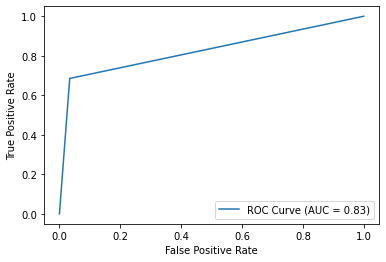

In [34]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred4)
roc_auc = roc_auc_score(y_test, pred4)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [35]:
pred4.sum()

1635

In [36]:
gsearch.cv_results_['params'][gsearch.best_index_]

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 50,
 'objective': 'binary:logistic'}

In [37]:
model_deepsea1 = XGBClassifier(
 reg_alpha = 20,
 reg_lambda = 2000,
 eta = 0.1,
 n_estimators=10,
 objective= 'binary:logistic',
 seed=7)

train_model_deepsea1 = model_deepsea1.fit(X_train, y_train)
#pred_deepsea1 = train_model_deepsea1.predict(X_val)
#print("Accuracy_model_deepsea1: %.4f" % (accuracy_score(y_val, pred_deepsea1)))
#print("F1_model_deepsea1: %.4f" % (f1_score(y_val, pred_deepsea1)))
#print("MCC_model_deepsea1: %.4f" % (matthews_corrcoef(y_val, pred_deepsea1)))
#print("ROC_AUC_model_deepsea1: %.4f" % (roc_auc_score(y_val, pred_deepsea1))) # don't know about call: y_score vs. pred
pred_deepsea1 = train_model_deepsea1.predict(X_test)
print("Accuracy_model_deepsea1: %.4f" % (accuracy_score(y_test, pred_deepsea1)))
print("F1_model_deepsea1: %.4f" % (f1_score(y_test, pred_deepsea1)))
print("MCC_model_deepsea1: %.4f" % (matthews_corrcoef(y_test, pred_deepsea1)))
print("ROC_AUC_model_deepsea1: %.4f" % (roc_auc_score(y_test, pred_deepsea1))) # don't know about call: y_score vs. pred

Accuracy_model_deepsea1: 0.9152
F1_model_deepsea1: 0.0000
MCC_model_deepsea1: 0.0000
ROC_AUC_model_deepsea1: 0.5000


/cm/shared/apps/spack/0.17.3/cpu/b/opt/spack/linux-rocky8-zen/gcc-8.5.0/anaconda3-2021.05-q4munrgvh7qp4o7r3nzcdkbuph4z7375/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [38]:
model_deepsea2 = XGBClassifier(
 reg_alpha = 0,
 reg_lambda = 10,
 eta = 0.1,
 n_estimators=100,
 objective= 'binary:logistic',
 seed=7)

train_model_deepsea2 = model_deepsea2.fit(X_train, y_train)
#pred_deepsea2 = train_model_deepsea2.predict(X_val)
#print("Accuracy_model_deepsea1: %.4f" % (accuracy_score(y_val, pred_deepsea2)))
#print("F1_model_deepsea2: %.4f" % (f1_score(y_val, pred_deepsea2)))
#print("MCC_model_deepsea2: %.4f" % (matthews_corrcoef(y_val, pred_deepsea2)))
#print("ROC_AUC_model_deepsea2: %.4f" % (roc_auc_score(y_val, pred_deepsea2))) # don't know about call: y_score vs. pred
pred_deepsea2 = train_model_deepsea2.predict(X_test)
print("Accuracy_model_deepsea1: %.4f" % (accuracy_score(y_test, pred_deepsea2)))
print("F1_model_deepsea2: %.4f" % (f1_score(y_test, pred_deepsea2)))
print("MCC_model_deepsea2: %.4f" % (matthews_corrcoef(y_test, pred_deepsea2)))
print("ROC_AUC_model_deepsea2: %.4f" % (roc_auc_score(y_test, pred_deepsea2))) # don't know about call: y_score vs. pred

Accuracy_model_deepsea1: 0.9417
F1_model_deepsea2: 0.6673
MCC_model_deepsea2: 0.6358
ROC_AUC_model_deepsea2: 0.8271


In [39]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_deepsea2).ravel()
print(tp, fp, fn, tn)

1073 586 484 16209


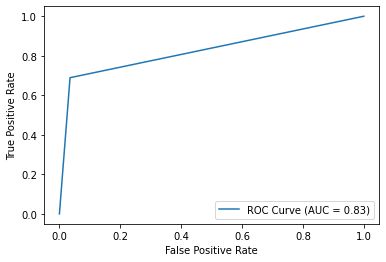

In [40]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred_deepsea2)
roc_auc = roc_auc_score(y_test, pred_deepsea2)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [41]:
model_regbase = XGBClassifier(
     colsample_bylevel = 0.6,
#    colsample_bytree = 0.75,
     colsample_bytree = 1.0,
#    gamma = 3.0,
     gamma = 5.0,
     learning_rate = 0.1,
     max_depth = 4,
#    min_child_weight = 3,
     min_child_weight = 4,
     n_estimators = 300,
     reg_alpha = 5.0,
     reg_lambda = 0.01,
     scale_pos_weight = 10.658093373,
#    subsample = 0.5
     subsample = 1.0
)

train_model_regbase = model_regbase.fit(X_train, y_train)
#pred_regbase = train_model_regbase.predict(X_val)
#print("Accuracy_model_regbase: %.4f" % (accuracy_score(y_val, pred_regbase)))
#print("F1_model_regbase: %.4f" % (f1_score(y_val, pred_regbase)))
#print("MCC_model_regbase: %.4f" % (matthews_corrcoef(y_val, pred_regbase)))
#print("ROC_AUC_model_regbase: %.4f" % (roc_auc_score(y_val, pred_regbase)))
pred_regbase = train_model_regbase.predict(X_test)
print("Accuracy_model_regbase: %.4f" % (accuracy_score(y_test, pred_regbase)))
print("F1_model_regbase: %.4f" % (f1_score(y_test, pred_regbase)))
print("MCC_model_regbase: %.4f" % (matthews_corrcoef(y_test, pred_regbase)))
print("ROC_AUC_model_regbase: %.4f" % (roc_auc_score(y_test, pred_regbase)))

Accuracy_model_regbase: 0.9298
F1_model_regbase: 0.7032
MCC_model_regbase: 0.7034
ROC_AUC_model_regbase: 0.9529


In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_regbase).ravel()
print(tp, fp, fn, tn)

1527 1259 30 15536


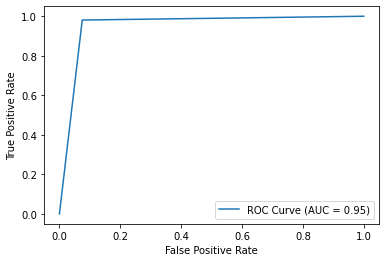

In [43]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred_regbase)
roc_auc = roc_auc_score(y_test, pred_regbase)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [52]:
# Save untuned model

from joblib import dump, load

best_estimator = train_model_regbase
dump(best_estimator, path_prefix + "DNABERT_2/Output_Models/" + "model_xpg_boost_PRVCS_REG_untuned.joblib")

['/expanse/lustre/projects/nji102/sgriesmer/DNABERT_2/Output_Models/model_xpg_boost_PRVCS_REG_untuned.joblib']

In [44]:
import xgboost as xgb

data_matrix = xgb.DMatrix(data=X_train, label=y_train)
# data_matrix = xgb.DMatrix(data=X, label=y)

params = {
    "colsample_bylevel": 0.6,
#   "colsample_bytree": 0.75,
    "colsample_bytree": 1.0,
#   "gamma": 3.0,
    "gamma": 5.0,
    "learning_rate": 0.1,
    "max_depth": 4,
#   "min_child_weight": 3,
    "min_child_weight": 4,
    "alpha": 5.0,
    "lambda": 0.01,
    "scale_pos_weight": 10.658093373,
#   "subsample": 0.5
    "subsample": 1.0
}

xgb_cv = xgb.cv(dtrain=data_matrix, params=params, nfold=10,
                    num_boost_round=100, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=7)


In [45]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.968172,0.000393,0.966847,0.002186
1,0.971841,0.000368,0.969564,0.000930
2,0.973086,0.000396,0.970624,0.001124
3,0.973738,0.000540,0.970969,0.000981
4,0.973887,0.000587,0.970878,0.000803
5,0.974319,0.000537,0.971278,0.000661
6,0.974655,0.000504,0.971427,0.000764
7,0.974856,0.000431,0.971666,0.000829
8,0.975125,0.000376,0.971737,0.000865
9,0.975354,0.000387,0.971748,0.000871


In [46]:
model_regbase.set_params(n_estimators=xgb_cv.shape[0])



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
train_model_regbase_cv = model_regbase.fit(X_train,y_train)
#pred_regbase_cv = train_model_regbase.predict(X_val)
#print("Accuracy_model_regbase_cv: %.4f" % (accuracy_score(y_val, pred_regbase_cv)))
#print("F1_model_regbase_cv: %.4f" % (f1_score(y_val, pred_regbase_cv)))
#print("MCC_model_regbase_cv: %.4f" % (matthews_corrcoef(y_val, pred_regbase_cv)))
#print("ROC_AUC_model_regbase_cv: %.4f" % (roc_auc_score(y_val, pred_regbase_cv)))
pred_regbase_cv = train_model_regbase.predict(X_test)
print("Accuracy_model_regbase_cv: %.4f" % (accuracy_score(y_test, pred_regbase_cv)))
print("F1_model_regbase_cv: %.4f" % (f1_score(y_test, pred_regbase_cv)))
print("MCC_model_regbase_cv: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv)))
print("ROC_AUC_model_regbase_cv: %.4f" % (roc_auc_score(y_test, pred_regbase_cv)))

Accuracy_model_regbase_cv: 0.9230
F1_model_regbase_cv: 0.6879
MCC_model_regbase_cv: 0.6929
ROC_AUC_model_regbase_cv: 0.9579


In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_regbase_cv).ravel()
print(tp, fp, fn, tn)

1557 1413 0 15382


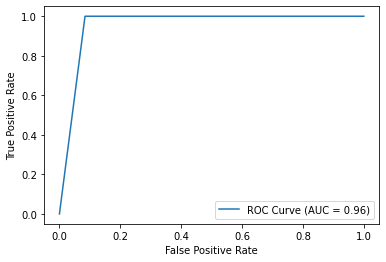

In [50]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred_regbase_cv)
roc_auc = roc_auc_score(y_test, pred_regbase_cv)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

Run best model on test dataset

In [53]:
# Save tuned model

from joblib import dump, load

best_estimator = train_model_regbase_cv
dump(best_estimator, path_prefix + "DNABERT_2/Output_Models/" + "model_xpg_boost_PRVCS_REG_tuned.joblib")

['/expanse/lustre/projects/nji102/sgriesmer/DNABERT_2/Output_Models/model_xpg_boost_PRVCS_REG_tuned.joblib']

In [ ]:
param_test = {
 'max_depth': range(2,8,2),
 'min_child_weight': range(2,8,2)
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(colsample_bylevel = 0.6,
                                                colsample_bytree = 1.0,
                                                gamma = 5.0,
                                                learning_rate = 0.1,
                                                max_depth = 4,
                                                min_child_weight = 4,
                                                n_estimators = 24,
                                                objective = 'binary:logistic',
                                                reg_alpha = 5.0,
                                                reg_lambda = 0.01,
                                                scale_pos_weight = 10.658093373,
                                                subsample = 1.0), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=5,
                       refit=True)

train_model_regbase_cv2 = gsearch.fit(X_train, y_train)
pred_regbase_cv2 = train_model_regbase_cv2.predict(X_test)
print("Accuracy_model_cv2: %.4f" % (accuracy_score(y_test, pred_regbase_cv2)))  
print("F1_model_cv2: %.4f" % (f1_score(y_test, pred_regbase_cv2)))  
print("MCC_model_cv2: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv2)))  
print("ROC_AUC_model_cv2: %.4f" % (roc_auc_score(y_test, pred_regbase_cv2)))  

In [ ]:
gsearch.cv_results_['params'][gsearch.best_index_]

In [ ]:
param_test = {
 'max_depth': [3,4,5],
 'min_child_weight': [3,4,5]
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(colsample_bylevel = 0.6,
                                                colsample_bytree = 1.0,
                                                gamma = 5.0,
                                                learning_rate = 0.1,
                                                max_depth = 4,
                                                min_child_weight = 4,
                                                n_estimators = 24,
                                                objective = 'binary:logistic',
                                                reg_alpha = 5.0,
                                                reg_lambda = 0.01,
                                                scale_pos_weight = 10.658093373,
                                                subsample = 1.0), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=10,
                       refit=True)

train_model_regbase_cv3 = gsearch.fit(X_train, y_train)
pred_regbase_cv3 = train_model_regbase_cv3.predict(X_test)
print("Accuracy_model_cv3: %.4f" % (accuracy_score(y_test, pred_regbase_cv3)))  
print("F1_model_cv3: %.4f" % (f1_score(y_test, pred_regbase_cv3)))  
print("MCC_model_cv3: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv3)))  
print("ROC_AUC_model_cv3: %.4f" % (roc_auc_score(y_test, pred_regbase_cv3)))  

In [ ]:
gsearch.cv_results_['params'][gsearch.best_index_]

In [ ]:
pd.DataFrame(gsearch.cv_results_)

In [ ]:
param_test = {
 'gamma': range(2,6),
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(colsample_bylevel = 0.6,
                                                colsample_bytree = 1.0,
                                                gamma = 5.0,
                                                learning_rate = 0.1,
                                                max_depth = 4,
                                                min_child_weight = 5,
                                                n_estimators = 24,
                                                objective = 'binary:logistic',
                                                reg_alpha = 5.0,
                                                reg_lambda = 0.01,
                                                scale_pos_weight = 10.658093373,
                                                subsample = 1.0), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=10,
                       refit=True)

train_model_regbase_cv4 = gsearch.fit(X_train, y_train)
pred_regbase_cv4 = train_model_regbase_cv4.predict(X_test)
print("Accuracy_model_cv4: %.4f" % (accuracy_score(y_test, pred_regbase_cv4)))  
print("F1_model_cv4: %.4f" % (f1_score(y_test, pred_regbase_cv4)))  
print("MCC_model_cv4: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv4)))  
print("ROC_AUC_model_cv4: %.4f" % (roc_auc_score(y_test, pred_regbase_cv4)))  

In [ ]:
gsearch.cv_results_['params'][gsearch.best_index_]

In [ ]:
pd.DataFrame(gsearch.cv_results_)

In [ ]:
param_test = {
 'subsample': [i/10.0 for i in range(6,10)],
 'colsample_bytree': [i/10.0 for i in range(6,10)]
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(colsample_bylevel = 0.6,
                                                colsample_bytree = 1.0,
                                                gamma = 3.0,
                                                learning_rate = 0.1,
                                                max_depth = 4,
                                                min_child_weight = 5,
                                                n_estimators = 24,
                                                objective = 'binary:logistic',
                                                reg_alpha = 5.0,
                                                reg_lambda = 0.01,
                                                scale_pos_weight = 10.658093373,
                                                subsample = 1.0), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=10,
                       refit=True)

train_model_regbase_cv5 = gsearch.fit(X_train, y_train)
pred_regbase_cv5 = train_model_regbase_cv5.predict(X_test)
print("Accuracy_model_cv5: %.4f" % (accuracy_score(y_test, pred_regbase_cv5)))  
print("F1_model_cv5: %.4f" % (f1_score(y_test, pred_regbase_cv5)))  
print("MCC_model_cv5: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv5)))  
print("ROC_AUC_model_cv5: %.4f" % (roc_auc_score(y_test, pred_regbase_cv5)))  

In [ ]:
gsearch.cv_results_['params'][gsearch.best_index_], gsearch.best_score_

In [ ]:
pd.DataFrame(gsearch.cv_results_)

In [ ]:
param_test = {
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 5, 100]
 'reg_alpha':[5, 6, 7, 8]
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(colsample_bylevel = 0.6,
                                                colsample_bytree = 1.0,
                                                gamma = 3.0,
                                                learning_rate = 0.1,
                                                max_depth = 4,
                                                min_child_weight = 5,
                                                n_estimators = 24,
                                                objective = 'binary:logistic',
                                                reg_alpha = 5.0,
                                                reg_lambda = 0.01,
                                                scale_pos_weight = 10.658093373,
                                                subsample = 1.0), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=10,
                       refit=True)

train_model_regbase_cv6 = gsearch.fit(X_train, y_train)
pred_regbase_cv6 = train_model_regbase_cv6.predict(X_test)
print("Accuracy_model_cv6: %.4f" % (accuracy_score(y_test, pred_regbase_cv6)))  
print("F1_model_cv6: %.4f" % (f1_score(y_test, pred_regbase_cv6)))  
print("MCC_model_cv6: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv6)))  
print("ROC_AUC_model_cv6: %.4f" % (roc_auc_score(y_test, pred_regbase_cv6)))  

In [ ]:
gsearch.cv_results_['params'][gsearch.best_index_], gsearch.best_score_

In [ ]:
pd.DataFrame(gsearch.cv_results_)

In [ ]:
# Save best model

In [ ]:
from joblib import dump, load

best_estimator = train_model_regbase_cv
dump(best_estimator, path_prefix + "DNABERT_2/Output_Models/" + "model_xpg_boost_PRVCS_REG_all.joblib")

In [ ]:
# Save default model

from joblib import dump, load

best_estimator = train_model1
dump(best_estimator, path_prefix + "DNABERT_2/Output_Models/" + "model_xpg_boost_PRVCS_REG_default.joblib")

In [ ]:
from joblib import dump, load

test_estimator = load('/expanse/lustre/projects/nji102/sgriesmer/DNABERT_2/Output_Models/model_xpg_boost_PRVCS_REG_all.joblib')

In [ ]:
test_pred = test_estimator.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score

print("Accuracy_best: %.4f" % (accuracy_score(y_test, test_pred)))
print("F1_best: %.4f" % (f1_score(y_test, test_pred)))
print("MCC_best: %.4f" % (matthews_corrcoef(y_test, test_pred)))
print("ROC_best: %.4f" % (roc_auc_score(y_test, test_pred)))

In [ ]:
test_pred.sum()

In [ ]:
# Load Rate_Patho dataset

In [ ]:
import pandas as pd

path_prefix = "/expanse/lustre/projects/nji102/sgriesmer/"

RARPAT_abs_diff_plus_log_odds_scores_norm = pd.read_csv(path_prefix + "DNABERT_2/output/RARPAT_0_102-abs_diff_plus_log_odds_scores_norm_results_by_variant.csv", sep=',')

In [ ]:
RARPAT_abs_diff_plus_log_odds_scores_norm.shape

In [ ]:
# Set model names to numbers

In [ ]:
RARPAT_abs_diff_plus_log_odds_scores_norm = RARPAT_abs_diff_plus_log_odds_scores_norm.set_axis(col_lab, axis="columns")

In [ ]:
RARPAT_abs_diff_plus_log_odds_scores_norm

In [ ]:
RARPAT_prvcs = pd.read_csv(path_prefix + "DNABERT_2/Datasets/PRVCS/test_dataset/Rare_Patho_SNV_dataset_XY-named.txt", sep='\t')

In [ ]:
y = RARPAT_prvcs['label']

In [ ]:
y

In [ ]:
RARPAT_pred = test_estimator.predict(RARPAT_abs_diff_plus_log_odds_scores_norm)

In [ ]:
print("Accuracy_model_REG: %.4f" % (accuracy_score(y, RARPAT_pred)))  
print("F1_model_REG: %.4f" % (f1_score(y, RARPAT_pred)))  
print("MCC_model_REG: %.4f" % (matthews_corrcoef(y, RARPAT_pred)))  
print("ROC_AUC_model_REG: %.4f" % (roc_auc_score(y , RARPAT_pred)))

Load ASD dataset

In [ ]:
ASD_abs_diff_plus_log_odds_scores_norm = pd.read_csv(path_prefix + "DNABERT_2/output/ASD_0_107-abs_diff_plus_log_odds_scores_norm_results_by_variant.csv", sep=',')

In [ ]:
ASD_abs_diff_plus_log_odds_scores_norm = ASD_abs_diff_plus_log_odds_scores_norm.set_axis(col_lab, axis="columns")

In [ ]:
ASD_prvcs = pd.read_csv(path_prefix + "DNABERT_2/Datasets/PRVCS/test_dataset/ASD_denovo_SNV_dataset_XY-named.txt", sep='\t')

In [ ]:
y = ASD_prvcs['label']

In [ ]:
ASD_pred = test_estimator.predict(ASD_abs_diff_plus_log_odds_scores_norm)

In [ ]:
print("Accuracy_model_REG: %.4f" % (accuracy_score(y, ASD_pred)))  
print("F1_model_REG: %.4f" % (f1_score(y, ASD_pred)))  
print("MCC_model_REG: %.4f" % (matthews_corrcoef(y, ASD_pred)))  
print("ROC_AUC_model_REG: %.4f" % (roc_auc_score(y , ASD_pred)))

Load GTEx dataset

In [ ]:
GTEX_abs_diff_plus_log_odds_scores_norm = pd.read_csv(path_prefix + "DNABERT_2/output/GTEX_0_796-abs_diff_plus_log_odds_scores_norm_results_by_variant.csv", sep=',')

In [ ]:
GTEX_abs_diff_plus_log_odds_scores_norm = GTEX_abs_diff_plus_log_odds_scores_norm.set_axis(col_lab, axis="columns")

In [ ]:
GTEX_prvcs = pd.read_csv(path_prefix + "DNABERT_2/Datasets/PRVCS/test_dataset/GTEx_eQTL_dataset_XY-named.txt", sep='\t')

In [ ]:
y = GTEX_prvcs['label']

In [ ]:
GTEX_pred = test_estimator.predict(GTEX_abs_diff_plus_log_odds_scores_norm)

In [ ]:
print("Accuracy_model_REG: %.4f" % (accuracy_score(y, GTEX_pred)))  
print("F1_model_REG: %.4f" % (f1_score(y, GTEX_pred)))  
print("MCC_model_REG: %.4f" % (matthews_corrcoef(y, GTEX_pred)))  
print("ROC_AUC_model_REG: %.4f" % (roc_auc_score(y , GTEX_pred)))

Load Somatic eQTL dataset

In [ ]:
SOMEQTL_abs_diff_plus_log_odds_scores_norm = pd.read_csv(path_prefix + "DNABERT_2/output/SOMEQTL_0_7513-abs_diff_plus_log_odds_scores_norm_results_by_variant.csv", sep=',')

In [ ]:
SOMEQTL_abs_diff_plus_log_odds_scores_norm = SOMEQTL_abs_diff_plus_log_odds_scores_norm.set_axis(col_lab, axis="columns")

In [ ]:
SOMEQTL_prvcs = pd.read_csv(path_prefix + "DNABERT_2/Datasets/PRVCS/test_dataset/Somatic_eQTL_dataset_XY-named.txt", sep='\t')

In [ ]:
y = SOMEQTL_prvcs['label']

In [ ]:
SOMEQTL_pred = test_estimator.predict(SOMEQTL_abs_diff_plus_log_odds_scores_norm)

In [ ]:
print("Accuracy_model_REG: %.4f" % (accuracy_score(y, SOMEQTL_pred)))  
print("F1_model_REG: %.4f" % (f1_score(y, SOMEQTL_pred)))  
print("MCC_model_REG: %.4f" % (matthews_corrcoef(y, SOMEQTL_pred)))  
print("ROC_AUC_model_REG: %.4f" % (roc_auc_score(y , SOMEQTL_pred)))